## Feature selection

Why would it even be necessary to select features? To some, this idea may seem counterintuitive, but there are at least two important reasons to get rid of unimportant features. The first is clear to every engineer: the more data, the higher the computational complexity. As long as we work with toy datasets, the size of the data is not a problem, but, for real loaded production systems, hundreds of extra features will be quite tangible. The second reason is that some algorithms take noise (non-informative features) as a signal and overfit.

### Statistical approaches

The most obvious candidate for removal is a feature whose value remains unchanged, i.e., it contains no information at all. If we build on this thought, it is reasonable to say that features with low variance are worse than those with high variance. So, one can consider cutting features with variance below a certain threshold.

#### Basado en estadísticos no supervisado

#### Criterios para eliminar columnas: 
+ desviación estandar ( en columnas numericas). Cuanta menos desviación más se parecen las filas.
+ correlación entra features. Las que menos tengan fuera.


In [1]:
import numpy as np

In [2]:
from sklearn.datasets import make_classification

x_data_generated, y_data_generated = make_classification(random_state=2)
x_data_generated.shape

(100, 20)

In [3]:
import pandas as pd
pd.DataFrame(x_data_generated).describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,-0.145033,-0.017168,-0.049622,0.075725,0.092452,0.071705,-0.158142,-0.181596,-0.094498,0.094681,0.012449,-0.075383,-0.001584,-0.096140,-0.043825,-0.036731,-0.075006,0.025058,0.048031,-0.007282
std,0.966821,1.175273,0.983100,0.862731,1.285579,1.065725,1.103524,0.986572,0.874027,1.012701,1.010560,1.062129,0.883884,1.015302,1.021657,0.883127,0.917972,1.035610,0.884694,1.133940
min,-2.311148,-3.223127,-2.235151,-1.622344,-3.816647,-2.514379,-2.953756,-2.515439,-2.216668,-2.184178,-3.326870,-2.936481,-2.191908,-2.428253,-2.299471,-2.252685,-2.192967,-2.996762,-2.414969,-2.519579
25%,-0.737555,-0.980979,-0.759039,-0.538344,-0.768838,-0.665162,-0.893006,-0.713491,-0.733841,-0.560017,-0.600594,-0.887131,-0.546160,-0.814640,-0.727949,-0.587528,-0.661499,-0.601420,-0.641250,-0.668396
50%,-0.125249,0.114112,-0.081276,0.006268,0.222489,0.173540,-0.180826,-0.119298,-0.145891,-0.031811,0.169262,-0.142863,-0.004777,-0.059738,-0.070677,-0.180745,-0.067819,0.049459,0.162739,-0.174093
75%,0.403084,0.819359,0.754061,0.697498,1.017697,0.561549,0.348437,0.489883,0.574697,0.785268,0.762891,0.661226,0.627256,0.516235,0.671739,0.578730,0.445392,0.673171,0.718999,0.787566
max,2.670337,2.640935,2.157737,2.551138,3.599992,3.310680,3.160966,2.144678,2.120783,2.487185,1.812086,2.839895,1.962370,2.302378,2.146890,2.242663,2.695427,2.529735,2.380484,2.603700


In [4]:
y_data_generated.shape

(100,)

In [5]:
np.array([8653875758732, 87548548637, 86458454, 434363, 764876874]).var()

np.float64(1.1922350557388514e+25)

In [9]:
from sklearn.feature_selection import VarianceThreshold

primer_filtro = VarianceThreshold(.7).fit_transform(x_data_generated)
primer_filtro.shape

(100, 20)

In [10]:

primer_filtro = VarianceThreshold(.8).fit_transform(x_data_generated)
primer_filtro.shape

(100, 15)

In [11]:
primer_filtro = VarianceThreshold(0.9).fit_transform(x_data_generated)
primer_filtro.shape

(100, 14)

#### Basado en estadísticos supervisado

In [14]:
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

x_data_kbest = SelectKBest(k=11).fit_transform(x_data_generated, y_data_generated) #Coge las 11 columnas que tienen más correlación con el target.

In [15]:
x_data_kbest.shape

(100, 11)

In [16]:
logit = LogisticRegression(random_state=42)

In [17]:
coss_val_res = cross_val_score(logit, x_data_generated, y_data_generated, cv=5)
np.mean(coss_val_res)

np.float64(0.8800000000000001)

In [18]:
coss_val_res = cross_val_score(logit, x_data_kbest, y_data_generated, cv=5)
np.mean(coss_val_res)

np.float64(0.89)

In [19]:
x_data_varth = VarianceThreshold(.9).fit_transform(x_data_generated)
coss_val_res = cross_val_score(logit, x_data_varth, y_data_generated, cv=5)
np.mean(coss_val_res)

np.float64(0.89)

We can see that our selected features have improved the quality of the classifier. Of course, this example is purely artificial; however, it is worth using for real problems.

#### Supervisado wrapper

In [20]:
from sklearn.svm import SVC
from sklearn.feature_selection import RFE
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt

digits = load_digits()
X = digits.images.reshape((len(digits.images)), -1)
y = digits.target

In [21]:
X.shape

(1797, 64)

In [ ]:
svc = LogisticRegression()
rfe = RFE(estimator=svc, n_features_to_select=10, step=1) #Qu´date las que valores como 10 mejores 
rfe.fit(X, y)

c:\Users\maxi\miniconda3\envs\data_analysis_env\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\maxi\miniconda3\envs\data_analysis_env\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/l

RFE(estimator=LogisticRegression(), n_features_to_select=10)

In [23]:
svc.fit(X, y)

c:\Users\maxi\miniconda3\envs\data_analysis_env\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
svc.score(X, y) # Con sus 64 columnas

1.0

In [ ]:
rfe.score(X, y) # Con sólo 10 columnas 

0.8447412353923205

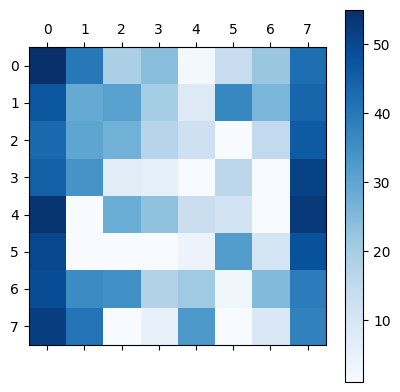

In [26]:
ranking = rfe.ranking_.reshape(digits.images[0].shape)

plt.matshow(ranking, cmap=plt.cm.Blues)
plt.colorbar();

In [30]:
rfe.ranking_

array([55, 41, 22, 14,  1,  8, 25, 42, 48, 28, 21, 34,  5, 23, 35, 43, 45,
       32, 10,  6, 19,  1, 30, 44, 46, 36,  1,  9, 11, 29,  1, 50, 54, 33,
       16, 26, 20,  7,  1, 53, 52, 31,  1,  2,  4,  1,  1, 49, 47, 38, 17,
       27, 15,  1, 13, 39, 51, 40,  1, 18, 24, 12,  3, 37])